In [47]:
import pandas as pd
from bertopic import BERTopic


data = pd.read_excel(r"") # Enter code here
data.head()

,Date,Chat,Author,Message
0,2023-11-10 08:30:00,maria,John,Morning Maria! Did you hear about the teacher ...
1,2023-11-10 08:31:00,maria,Maria,"Morning! Yes, it’s really becoming a crisis in..."
2,2023-11-10 08:33:00,maria,John,Absolutely. I was reading that schools are str...
3,2023-11-10 08:35:00,maria,Maria,It’s even worse in rural areas. Sometimes they...
4,2023-11-10 08:37:00,maria,John,That’s concerning. Kids deserve trained educat...


In [37]:


# 1. NaN-Werte durch leere Strings ersetzen
data['Message'] = data['Message'].fillna('')

# 2. Alle Werte in der Spalte 'Message' in Strings umwandeln
data['Message'] = data['Message'].astype(str)



In [38]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")

In [39]:
# Topic Modell auf die Messages anwenden
topics, probs = topic_model.fit_transform(data['Message'])

In [52]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,323,-1_it_that_the_to,"[it, that, the, to, you, and, for, we, about, ...",[And taking the time to make sure we’re ready ...
1,0,101,0_the_you_to_planning,"[the, you, to, planning, is, and, any, some, t...",[Spain sounds great! Which city are you planni...
2,1,89,1_cocktail_cocktails_good_and,"[cocktail, cocktails, good, and, we, lime, dri...","[You know, we should definitely add that to ou..."
3,2,81,2_they_re_so_their,"[they, re, so, their, are, and, like, fascinat...","[I know, right? They’re so relaxed, it’s like ..."
4,3,66,3_teachers_could_teaching_students,"[teachers, could, teaching, students, would, t...",[Perfect. This could be a really special event...
5,4,42,4_forward_looking_it_ll,"[forward, looking, it, ll, let, be, to, amazin...","[Good to know! I’m looking forward to it., It’..."
6,5,38,5_car_accident_driving_bad,"[car, accident, driving, bad, driver, speeding...",[Speeding on slippery roads is always a bad co...
7,6,31,6_work_just_piling_it,"[work, just, piling, it, feeling, up, but, you...",[Right! And the rush of adrenaline makes it al...
8,7,31,7_jumping_skydiving_bungee_extreme,"[jumping, skydiving, bungee, extreme, was, spo...","[I’ve done some rock climbing, but that’s not ..."
9,8,27,8_family_families_is_think,"[family, families, is, think, agree, everythin...",[I get that. Big family gatherings can be a lo...


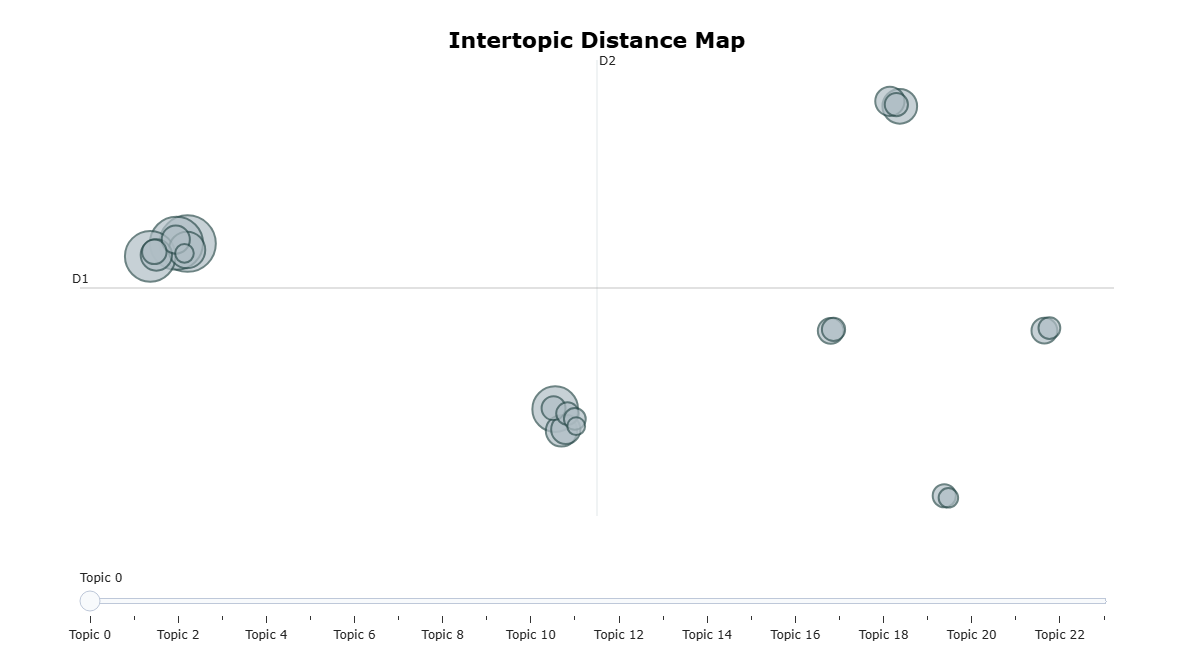

In [41]:
topic_model.visualize_topics()

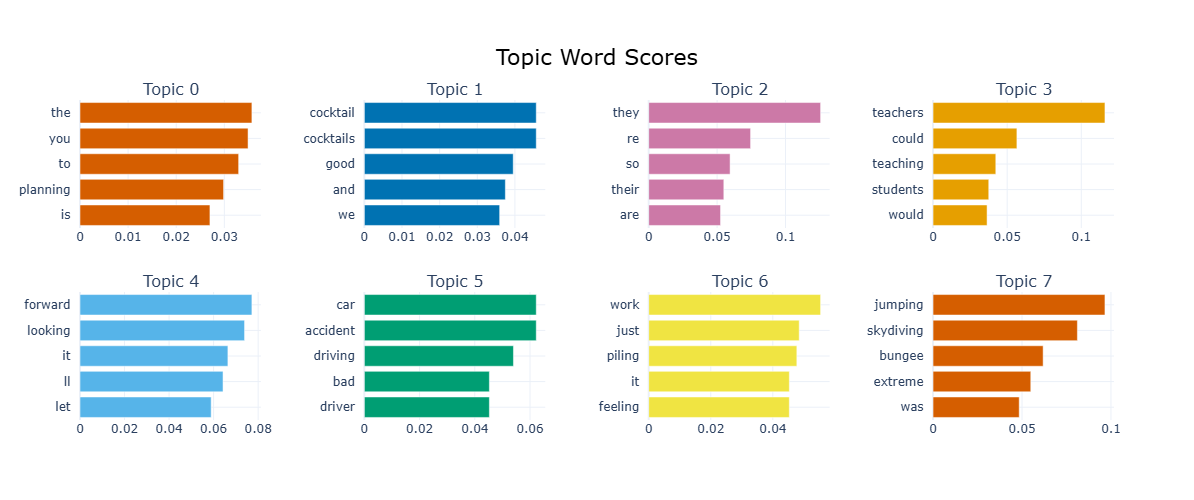

In [42]:
topic_model.visualize_barchart()

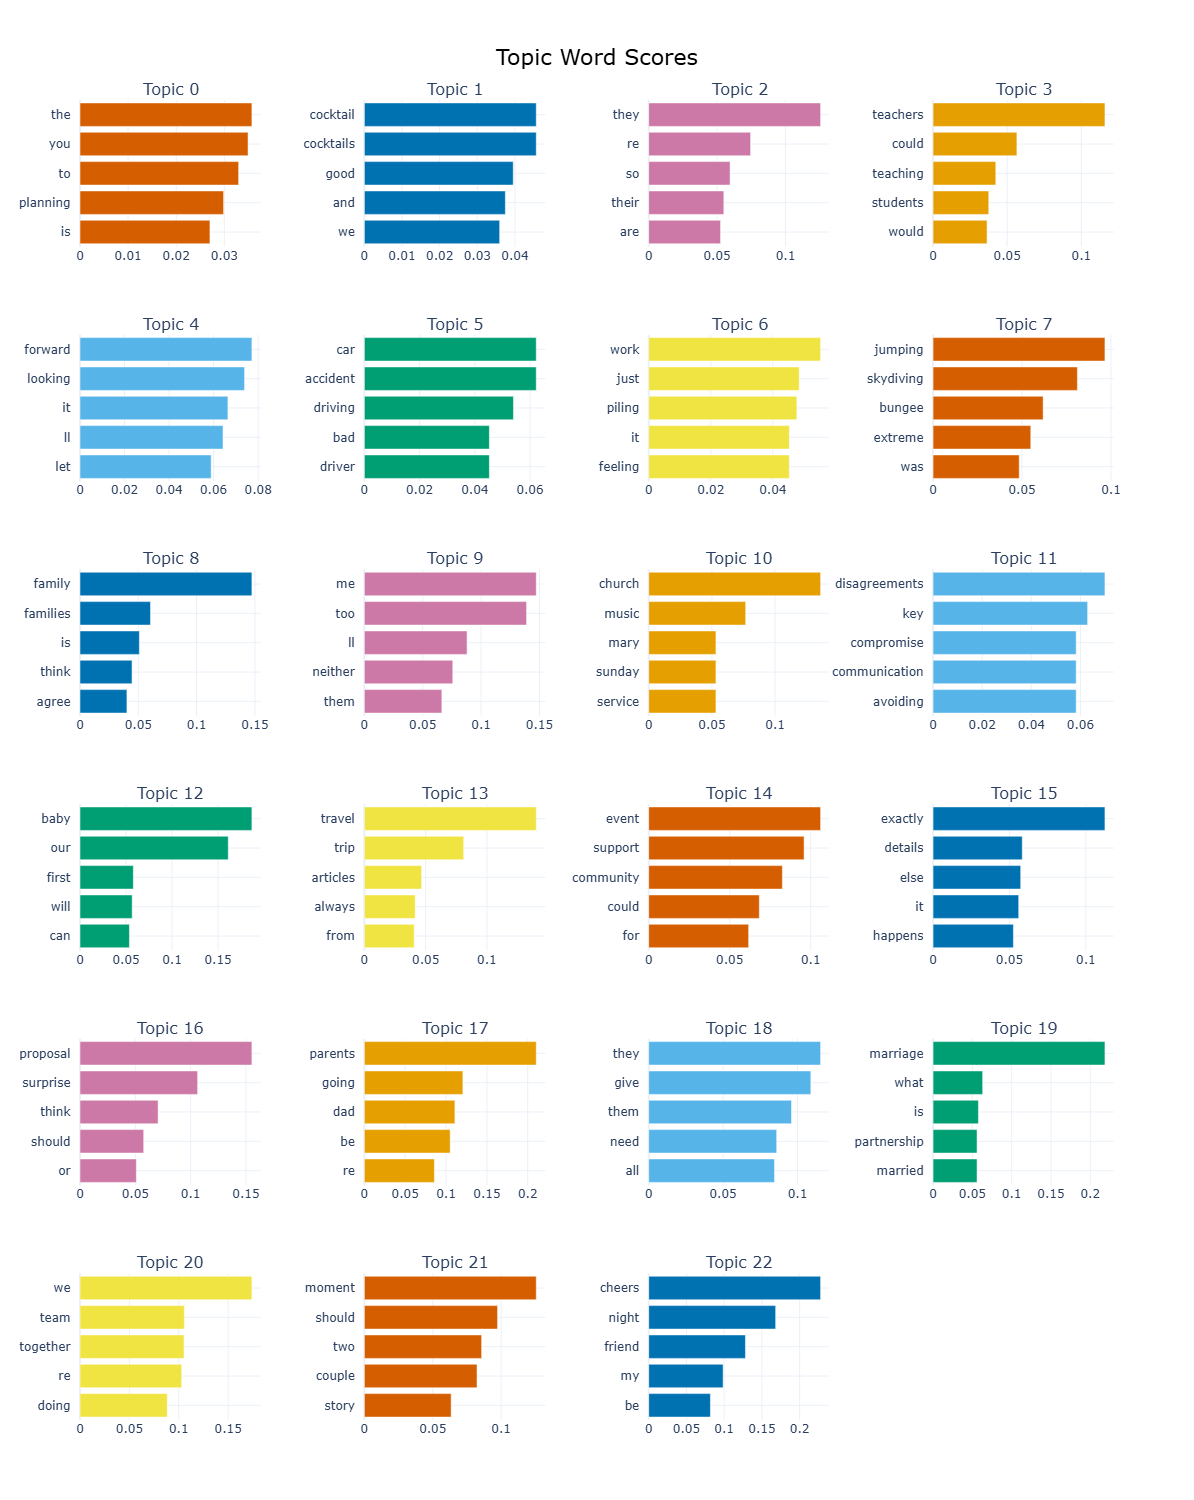

In [43]:
topic_model.visualize_barchart(topics=list(range(23)))

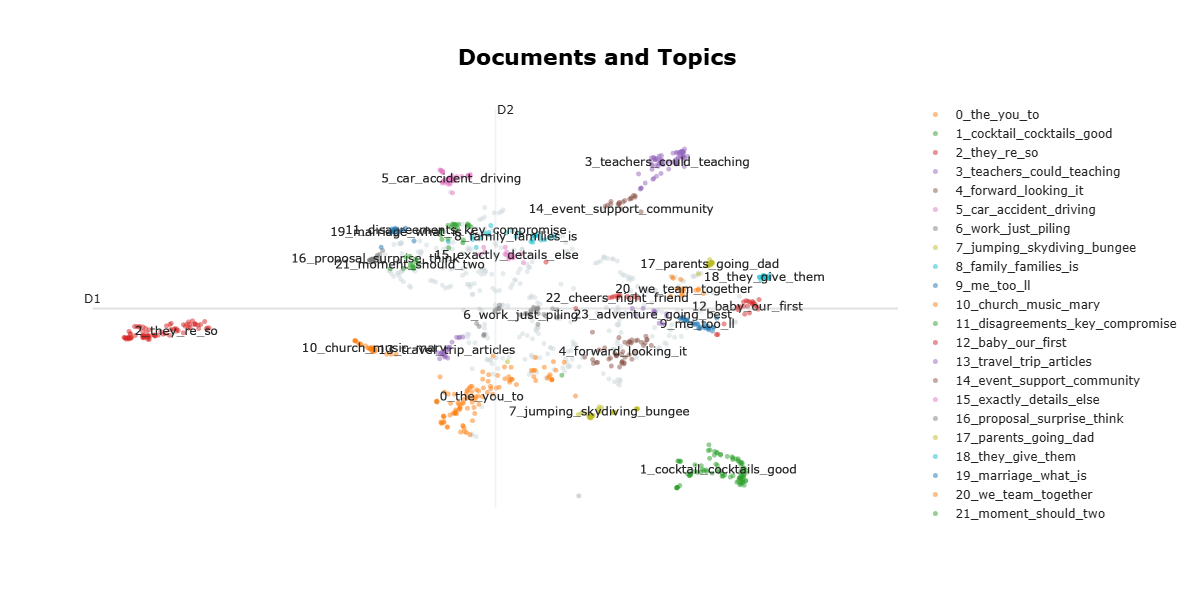

In [44]:

data = data.reset_index(drop=True) 
topic_model.visualize_documents(data['Message'], topics=list(range(45)), custom_labels=True, height=600)
#topic_model.visualize_documents(data['Message'],topics=list(range(40)),custom_labels=custom_labels,height=600)

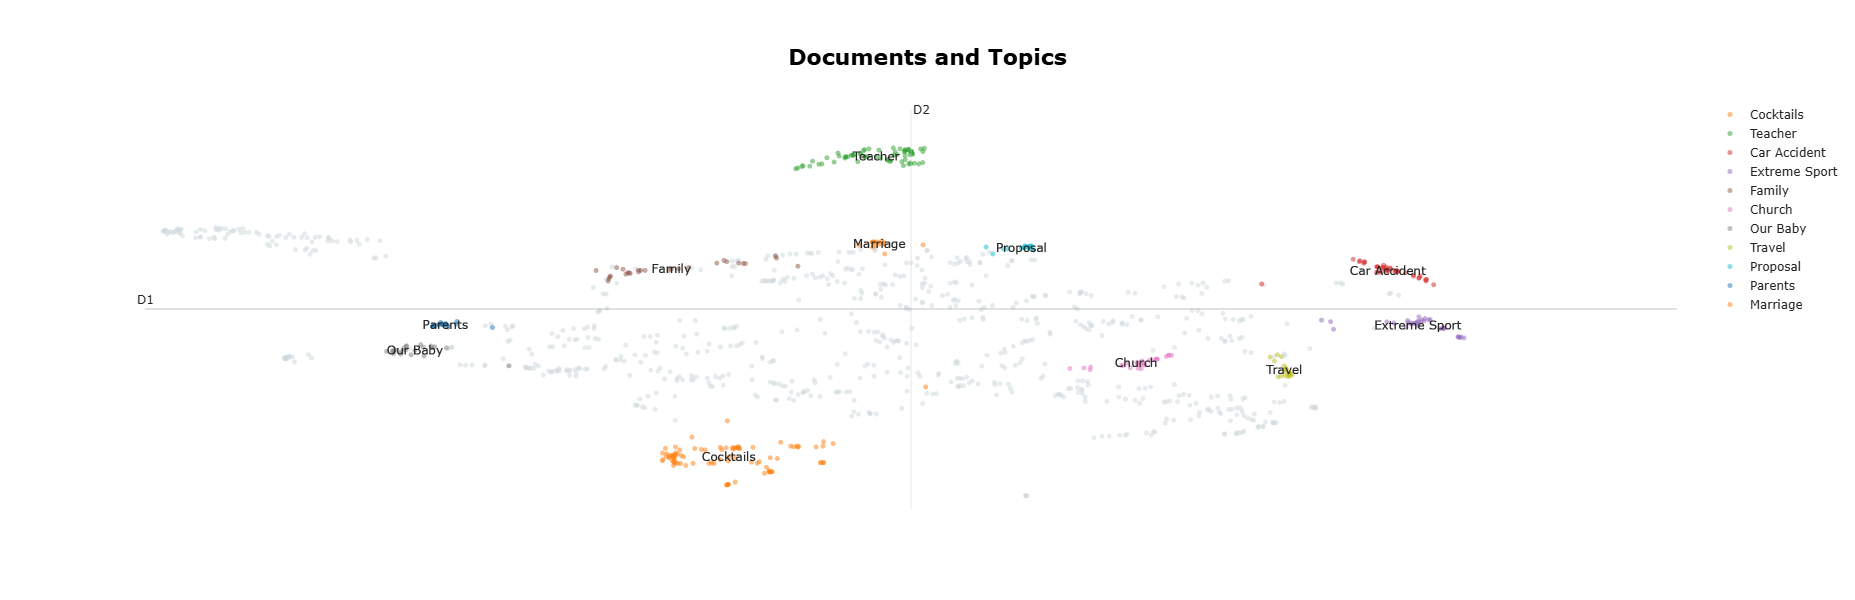

In [54]:
#Label Topics
topic_model.set_topic_labels({1:"Cocktails", 3: "Teacher", 5: "Car Accident",7: "Extreme Sport",8: "Family",10: "Church",12: "Our Baby",13: "Travel",16: "Proposal",17: "Parents",19: "Marriage"})

# Specify the topics you want to visualize
selected_topics = [1,3,5,7,8,10,12,13,16,17,19]

# Visualize only the selected topics
topic_model.visualize_documents(data['Message'], topics=selected_topics, custom_labels=True, height=600)